# Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

Developed by 
- Vijender Singh (vijendersingh412@gmail.com)

# Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score,recall_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Understanding Data

In [4]:
df = pd.read_csv('telecom_churn_data.csv')

In [5]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,...,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,133.670805,133.018098,130.302327,197.935577,197.045133,196.574803,190.337222,9.950013,7.149898,7.292981,6.343841,13.911337,9.818732,9.971890,8.555519,47.100763,46.473010,45.887806,44.584446,93.342088,91.397131,91.755128,90.463192,3.751013,3.792985,3.677991,3.655123,1.123056,1.368500,1.433821,...,128.995847,135.410689,136.056613,89.555057,89.384120,91.173849,100.264116,86.398003,85.914450,86.599478,93.712026,0.025086,0.023034,0.020844,0.015971,0.079641,0.083221,0.081001,0.068781,0.389384,0.439634,0.450075,0.393104,0.075921,0.078581,0.082941,0.086341,0.074781,0.080401,0.084501,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,308.794148,308.951589,308.477668,316.851613,325.862803,327.170662,319.396092,72.825411,73.447948,68.402466,57.137537,71.443196,58.455762,64.713221,58.438186,150.856393,155.318705,151.184830,147.995390,162.780544,157.492308,156.537048,158.681454,14.230438,14.264986,13.270996,13.457549,5.448946,7.533445,6.783335,...,541.494013,558.775335,577.394194,193.124653,195.893924,188.180936,216.291992,172.767523,176.379871,168.247852,171.384224,0.156391,0.150014,0.142863,0.125366,0.295058,0.304395,0.299568,0.278120,1.497320,1.636230,1.630263,1.347140,0.363371,0.387231,0.384947,0.384978,0.568344,0.628334,0.660234,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [7]:
df.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [8]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,...,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,...,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,...,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [9]:
df.tail()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
99994,7001548952,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,18.471,69.161,57.530,29.950,5.40,3.36,5.91,0.00,15.19,54.46,52.79,27.14,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,5.40,3.36,5.91,0.00,12.78,54.46,49.58,24.78,0.00,0.00,0.00,...,0.00,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,3199,0.00,0.00,0.00,0.0
99995,7000607688,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,112.201,77.811,79.081,140.835,29.26,18.13,16.06,49.49,100.83,69.01,66.39,56.13,0.0,0.0,0.0,0.95,0.0,0.0,0.0,4.23,28.93,18.13,16.06,49.49,91.34,47.53,57.51,46.71,1.71,9.81,5.83,...,0.00,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2052,0.00,0.00,0.00,0.0
99996,7000087541,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,229.187,0.000,0.000,0.000,1.11,NaN,NaN,NaN,21.04,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.11,NaN,NaN,NaN,13.33,NaN,NaN,NaN,0.00,NaN,NaN,...,0.00,0.0,0.00,141.48,NaN,NaN,NaN,2.40,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1.0,NaN,NaN,NaN,185,0.00,0.00,0.00,0.0
99997,7000498689,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,322.991,303.386,606.817,731.010,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1382.08,2683.3,4177.14,235.68,301.34,602.68,725.69,235.68,301.34,602.68,725.68,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,1,2,4,4,1,0,0,0,1.0,1.0,1.0,1.0,478,1445.74,1151.03,1173.18,0.0
99998,7001905007,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,687.065,0.000,0.000,0.000,84.34,NaN,NaN,NaN,166.46,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,84.34,NaN,NaN,NaN,166.46,NaN,NaN,NaN,0.00,NaN,NaN,...,0.00,0.0,0.00,11.40,NaN,NaN,NaN,18.68,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,NaN,NaN,NaN,751,0.00,0.00,0.00,0.0


In [10]:
df.shape

(99999, 226)

Data is divided into 3 parts
* Good Phase
* Action Phase 
* Churn Phase


# Handling Missing Data

1. Impute zero where we are sure that the missing should be zero
2. Remove those with high percentage of missing values
3. Try advance Imputation Methods (https://www.kaggle.com/athi94/investigating-imputation-methods)
4. Identify Categorical and Continuous columns


In [11]:
# Null check
(df.isnull().sum() * 100 / len(df)).sort_values(ascending=False)

count_rech_2g_6             74.846748
date_of_last_rech_data_6    74.846748
count_rech_3g_6             74.846748
av_rech_amt_data_6          74.846748
max_rech_data_6             74.846748
                              ...    
last_day_rch_amt_6           0.000000
last_day_rch_amt_7           0.000000
last_day_rch_amt_8           0.000000
last_day_rch_amt_9           0.000000
mobile_number                0.000000
Length: 226, dtype: float64

Selecting columns having null more than 60%

In [12]:
dropped_columns = df.columns[df.apply(lambda df : (df.isnull().sum() * 100 / len(df))>60)]
dropped_columns

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

Dropping columns having greater than 60% null values

In [13]:
df.drop(dropped_columns,axis=1,inplace=True)

Dropping dates columns as we dont need going ahead

In [14]:
df.drop(columns=['last_date_of_month_6','last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8','date_of_last_rech_9',],inplace=True)

In [15]:
(df.isnull().sum() * 100 / len(df)).sort_values(ascending=False)

loc_ic_t2m_mou_9      7.745077
loc_og_t2m_mou_9      7.745077
std_ic_t2t_mou_9      7.745077
loc_og_t2t_mou_9      7.745077
std_ic_t2f_mou_9      7.745077
                        ...   
last_day_rch_amt_6    0.000000
last_day_rch_amt_7    0.000000
last_day_rch_amt_8    0.000000
last_day_rch_amt_9    0.000000
mobile_number         0.000000
Length: 178, dtype: float64

# Remove unwanted columns if possible like mobile number and circle id

In [16]:
df.drop(columns=['mobile_number','circle_id'],inplace=True)

In [17]:
df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,...,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,...,252,252,0,252,252,252,0,252,252,252,0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,...,384,283,121,44,154,65,50,44,23,30,0,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1006,0.0,0.0,0.00,0.00
2,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.0,135.54,45.76,0.48,60.66,...,315,116,358,86,200,86,100,0,200,86,0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,8.42,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1103,0.0,0.0,4.17,0.00
3,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.0,0.00,0.00,0.00,183.03,...,310,601,410,60,50,50,50,30,50,50,30,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2491,0.0,0.0,0.00,0.00
4,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,1.93,0.0,0.00,0.00,0.00,117.96,...,350,287,200,56,110,110,50,50,110,110,50,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1526,0.0,0.0,0.00,0.00


Remove Columns which have single unique value

In [18]:
df.shape

(99999, 176)

In [19]:
df = df.loc[:,df.apply(pd.Series.nunique) != 1]
df.shape

(99999, 165)

# Filter High Value Customers

Steps:
1. Calculate total data recharge amount
2. Calculate total recharge amount 
   
   i. call recharge amount (total_rech_amt)+ data recharge amount
3. Calculate average recharge done by customer in june and july
4. Look at the 70th percentile recharge amount
5. Retain only those customers who have recharged their mobiles with more than or equal to 70th percentile


In [20]:
df['avg_rech_amt_per_month'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2

In [21]:
df.avg_rech_amt_per_month.describe(percentiles = [0.70])

count    99999.000000
mean       325.238792
std        370.833466
min          0.000000
50%        229.000000
70%        368.500000
max      37762.500000
Name: avg_rech_amt_per_month, dtype: float64

In [22]:
new_df = df[(df['avg_rech_amt_per_month']>368.50)]
new_df.shape

(29979, 166)

# Derive Churn

Steps:
1. Calculate total incoming and outgoing minutes of usage
2. Calculate 2g and 3g data consumption
3. Create chrun varaible: those who have not used either calls or internet in the month of sept are customers who have churned
4. Check Churn percentage
5. Delete columns that belong to the churn month

In [23]:
new_df[['total_ic_mou_9','total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].sum(axis = 1) 

7           0.00
8         177.09
13       1077.95
16        590.30
17        718.21
          ...   
99970     651.59
99974     457.12
99986    2592.97
99988     841.39
99997    4265.02
Length: 29979, dtype: float64

In [24]:
new_df['total_usage'] = new_df[['total_ic_mou_9','total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].sum(axis = 1) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
new_df['churn'] = np.where(new_df['total_usage']> 0, 0,1)
new_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,...,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_per_month,total_usage,churn
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,...,1580,790,1580,0,0,0,779,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,0.00,1
8,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,...,90,154,30,36,50,0,10,0,0.0,356.0,0.03,0.0,0.0,750.95,11.94,0.0,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,177.09,0
13,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.78,7.98,35.26,1.44,12.78,49.63,6.19,36.01,6.14,151.13,47.28,294.46,108.24,4.54,0.00,23.51,5.29,0.0,0.0,0.49,0.0,205.31,53.48,353.99,119.69,...,110,110,130,130,110,50,0,0,0.0,0.0,0.02,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,1077.95,0
16,430.975,299.869,187.894,206.490,50.51,74.01,70.61,31.34,296.29,229.74,162.76,224.39,0.00,2.83,0.00,0.00,0.00,17.74,0.00,0.00,42.61,65.16,67.38,26.88,273.29,145.99,128.28,201.49,0.00,4.48,10.26,4.66,0.0,0.0,0.00,0.0,315.91,215.64,205.93,233.04,...,110,110,130,220,100,100,130,220,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,0.0,459.0,590.30,0
17,690.008,18.980,25.499,257.583,1185.91,9.28,7.79,558.51,61.64,0.00,5.54,87.89,0.00,4.76,4.81,0.00,0.00,8.46,13.34,17.98,38.99,0.00,0.00,36.41,58.54,0.00,0.00,9.38,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,97.54,0.00,0.00,45.79,...,110,0,30,130,30,0,0,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,667,0.00,0.00,0.00,0.0,408.0,718.21,0


In [26]:
new_df.drop('total_usage',axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
new_df = new_df.loc[:, ~new_df.columns.str.contains('_9')]
new_df.shape

(29979, 127)

# EDA

In [28]:
new_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,...,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_per_month,churn
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,...,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,...,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,...,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.00,0.00,0.00,30.89,...,0.00,0.00,0.00,10,6,2,570,348,160,110,110,130,100,100,130,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,0.0,459.0,0
17,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,4.76,4.81,0.00,8.46,13.34,38.99,0.00,0.00,58.54,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,97.54,0.00,0.00,1146.91,0.81,0.00,1.55,0.00,0.00,0.00,0.00,0.00,1148.46,...,0.00,0.00,0.00,19,2,4,816,0,30,110,0,30,30,0,0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,667,0.00,0.00,0.00,0.0,408.0,0


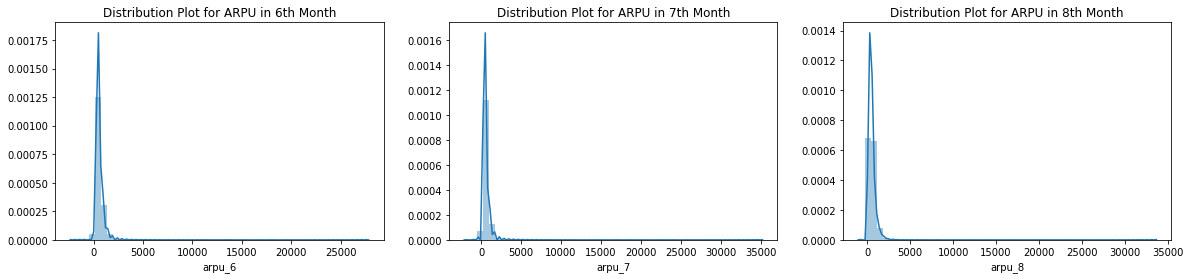

In [29]:
fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,4))
ax[0].set_title("Distribution Plot for ARPU in 6th Month")
sns.distplot(new_df.arpu_6,ax=ax[0])
ax[1].set_title("Distribution Plot for ARPU in 7th Month")
sns.distplot(new_df.arpu_7,ax=ax[1])
ax[2].set_title("Distribution Plot for ARPU in 8th Month")
sns.distplot(new_df.arpu_8,ax=ax[2])
plt.show()

In [30]:
new_df['churn'].value_counts()

0    27390
1     2589
Name: churn, dtype: int64

Text(0.5, 1.0, 'Churn status Distribution')

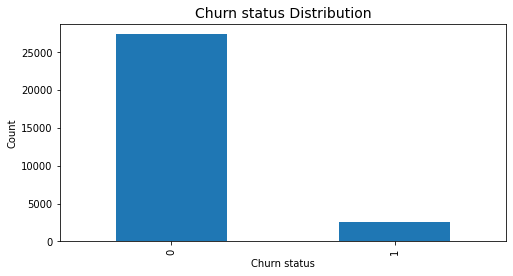

In [32]:
plt.figure(figsize=(8,4))
new_df['churn'].value_counts().plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Churn status')
plt.title('Churn status Distribution',fontsize=14)

In [33]:
y = new_df['churn']
churn = (sum(y)/len(y.index))*100
print(churn)
print(new_df.shape)

8.636045231662164
(29979, 127)


Text(0.5, 1.0, 'Non-Churn')

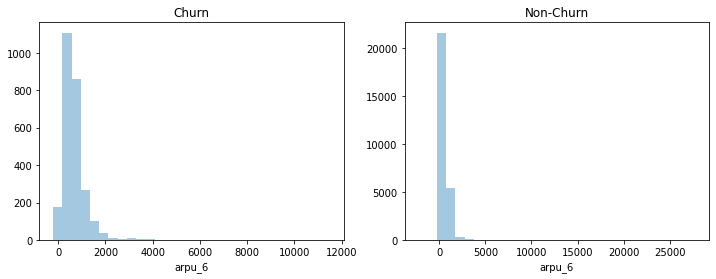

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(new_df[new_df['churn']==1].arpu_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(new_df[new_df['churn']==0].arpu_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

Incoming Calls Usage

In [35]:
cols = [['loc_ic_mou_6','std_ic_mou_6','isd_ic_mou_6','roam_ic_mou_6','spl_ic_mou_6','ic_others_6','total_ic_mou_6'],
        ['loc_ic_mou_7','std_ic_mou_7','isd_ic_mou_7','roam_ic_mou_7','spl_ic_mou_7','ic_others_7','total_ic_mou_7'],
        ['loc_ic_mou_8','std_ic_mou_8','isd_ic_mou_8','roam_ic_mou_8','spl_ic_mou_8','ic_others_8','total_ic_mou_8']]

# column description stats
for i in range(0,3):
    display(new_df[cols[i]].describe())


,loc_ic_mou_6,std_ic_mou_6,isd_ic_mou_6,roam_ic_mou_6,spl_ic_mou_6,ic_others_6,total_ic_mou_6
count,29663.000000,29663.000000,29663.000000,29663.000000,29663.000000,29663.000000,29979.000000
mean,246.664876,51.694485,11.263071,17.613734,0.067447,1.202479,307.624011
std,313.572850,141.211856,67.563787,79.593002,0.195231,14.068195,361.286101
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.355000,2.860000,0.000000,0.000000,0.000000,0.000000,90.035000
50%,153.480000,15.430000,0.000000,0.000000,0.000000,0.000000,205.340000
75%,317.825000,48.040000,0.000000,0.000000,0.000000,0.080000,393.835000
max,6496.110000,5459.630000,3965.690000,2613.310000,19.760000,1344.140000,6798.640000


,loc_ic_mou_7,std_ic_mou_7,isd_ic_mou_7,roam_ic_mou_7,spl_ic_mou_7,ic_others_7,total_ic_mou_7
count,29676.000000,29676.000000,29676.000000,29676.000000,29676.000000,29676.000000,29979.000000
mean,250.242986,53.939896,12.467359,13.673468,0.018248,1.493254,314.954126
std,316.188509,149.898756,77.343430,76.719673,0.182923,15.492347,369.768358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,65.780000,3.010000,0.000000,0.000000,0.000000,0.000000,98.840000
50%,156.950000,16.480000,0.000000,0.000000,0.000000,0.000000,211.240000
75%,319.122500,50.940000,0.000000,0.000000,0.000000,0.030000,396.915000
max,6466.740000,6745.760000,4747.910000,3813.290000,21.330000,1495.940000,7279.080000


,loc_ic_mou_8,std_ic_mou_8,isd_ic_mou_8,roam_ic_mou_8,spl_ic_mou_8,ic_others_8,total_ic_mou_8
count,29041.000000,29041.000000,29041.000000,29041.000000,29041.00000,29041.000000,29979.000000
mean,241.899720,49.737203,12.065624,13.691460,0.02850,1.277311,295.472794
std,309.094389,142.998561,76.095029,75.744432,0.11818,13.098826,360.411762
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,57.590000,2.040000,0.000000,0.000000,0.00000,0.000000,78.930000
50%,150.010000,13.630000,0.000000,0.000000,0.00000,0.000000,193.530000
75%,310.160000,45.190000,0.000000,0.000000,0.00000,0.080000,380.450000
max,5748.810000,5957.140000,4100.380000,4169.810000,6.23000,1209.860000,5990.710000


Almost all the Incoming calls usage columns seem to have outliers at the top percentile.

Outgoing Calls Usage

In [36]:
cols = [['loc_og_mou_6','std_og_mou_6','isd_og_mou_6','roam_og_mou_6','spl_og_mou_6','og_others_6','total_og_mou_6'],
        ['loc_og_mou_7','std_og_mou_7','isd_og_mou_7','roam_og_mou_7','spl_og_mou_7','og_others_7','total_og_mou_7'],
        ['loc_og_mou_8','std_og_mou_8','isd_og_mou_8','roam_og_mou_8','spl_og_mou_8','og_others_8','total_og_mou_8']]

# column description stats
for i in range(0,3):
    display(new_df[cols[i]].describe())

,loc_og_mou_6,std_og_mou_6,isd_og_mou_6,roam_og_mou_6,spl_og_mou_6,og_others_6,total_og_mou_6
count,29663.000000,29663.000000,29663.000000,29663.00000,29663.000000,29663.000000,29979.000000
mean,286.073738,399.329215,2.290991,29.66101,5.983799,0.700584,687.068925
std,381.029238,608.562481,46.186003,119.22124,18.719302,2.293435,660.557039
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,53.390000,6.710000,0.000000,0.00000,0.000000,0.000000,266.480000
50%,169.560000,131.390000,0.000000,0.00000,0.260000,0.000000,510.760000
75%,377.060000,579.245000,0.000000,0.00000,5.280000,0.000000,899.960000
max,10643.380000,8432.990000,5900.660000,3775.11000,1023.210000,100.610000,10674.030000


,loc_og_mou_7,std_og_mou_7,isd_og_mou_7,roam_og_mou_7,spl_og_mou_7,og_others_7,total_og_mou_7
count,29676.000000,29676.000000,29676.000000,29676.000000,29676.000000,29676.000000,29979.000000
mean,287.122076,419.861391,2.230369,22.281627,7.505682,0.048137,709.531995
std,376.804351,639.529047,45.874448,98.448242,23.181829,2.757213,685.283264
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.487500,6.380000,0.000000,0.000000,0.000000,0.000000,275.275000
50%,173.460000,138.380000,0.000000,0.000000,0.830000,0.000000,526.130000
75%,378.690000,621.660000,0.000000,0.000000,7.250000,0.000000,931.305000
max,7674.780000,10936.730000,5490.280000,2812.040000,1265.790000,370.130000,11365.310000


,loc_og_mou_8,std_og_mou_8,isd_og_mou_8,roam_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8
count,29041.000000,29041.000000,29041.000000,29041.000000,29041.000000,29041.000000,29979.000000
mean,269.745785,365.243279,2.095232,22.177442,7.111893,0.061106,624.107691
std,369.470137,622.988427,45.534328,107.926673,23.236275,3.375300,686.211375
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.390000,3.160000,0.000000,0.000000,0.000000,0.000000,188.965000
50%,157.380000,84.910000,0.000000,0.000000,0.680000,0.000000,435.810000
75%,357.540000,502.210000,0.000000,0.000000,6.710000,0.000000,833.435000
max,11039.910000,13980.060000,5681.540000,5337.040000,1390.880000,394.930000,14043.060000


Outgoing calls usage columns also seem to have outliers at the top percentile.

Operatorwise Calls Usage

In [37]:
cols = [['onnet_mou_6','offnet_mou_6','loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6'],
        ['loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','loc_og_t2c_mou_6','std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6'],
        ['onnet_mou_7','offnet_mou_7','loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7','std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7'],
        ['loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','loc_og_t2c_mou_7','std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2f_mou_7'],
        ['onnet_mou_8','offnet_mou_8','loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8','std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8'],
        ['loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8','loc_og_t2c_mou_8','std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_t2f_mou_8']]

# column description stats
for i in range(0,6):
    display(new_df[cols[i]].describe())

,onnet_mou_6,offnet_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6
count,29663.000000,29663.000000,29663.000000,29663.000000,29663.000000,29663.000000,29663.000000,29663.000000
mean,299.392147,422.582059,69.504337,161.379733,15.770853,16.411298,32.371603,2.907568
std,462.369385,471.281393,159.386596,222.657561,46.062813,79.300976,101.609873,20.042560
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.030000,141.440000,8.810000,34.860000,0.000000,0.000000,0.550000,0.000000
50%,128.480000,285.990000,29.680000,95.510000,2.060000,1.130000,7.350000,0.000000
75%,357.655000,527.605000,74.620000,204.610000,12.680000,10.510000,27.970000,0.200000
max,7376.710000,8362.360000,6351.440000,4693.860000,1678.410000,5459.560000,4630.230000,1351.110000


,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6
count,29663.000000,29663.000000,29663.000000,29663.000000,29663.000000,29663.000000,29663.000000
mean,95.742759,183.268532,7.053548,1.584424,191.914956,205.376377,2.033503
std,238.016910,250.855944,22.780541,6.927055,411.577801,415.323157,12.528190
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.810000,31.750000,0.000000,0.000000,0.000000,1.940000,0.000000
50%,33.340000,103.530000,0.380000,0.000000,13.690000,39.440000,0.000000
75%,92.700000,242.260000,5.205000,0.000000,181.725000,214.390000,0.000000
max,6431.330000,4729.740000,1466.030000,342.860000,7366.580000,8314.760000,628.560000


,onnet_mou_7,offnet_mou_7,loc_ic_t2t_mou_7,loc_ic_t2m_mou_7,loc_ic_t2f_mou_7,std_ic_t2t_mou_7,std_ic_t2m_mou_7,std_ic_t2f_mou_7
count,29676.000000,29676.000000,29676.000000,29676.000000,29676.000000,29676.000000,29676.000000,29676.000000
mean,307.701888,428.433657,71.047016,162.498289,16.687581,17.078657,33.831256,3.025899
std,483.432401,487.288606,168.071992,220.025170,49.724639,85.149106,106.319301,20.624196
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.775000,139.627500,9.940000,39.640000,0.000000,0.000000,0.560000,0.000000
50%,128.120000,285.630000,30.810000,98.195000,2.330000,1.290000,7.760000,0.000000
75%,365.127500,537.017500,75.380000,205.190000,13.280000,11.190000,29.580000,0.280000
max,8157.780000,9667.130000,5709.590000,4388.730000,1983.010000,5800.930000,3470.380000,1136.080000


,loc_og_t2t_mou_7,loc_og_t2m_mou_7,loc_og_t2f_mou_7,loc_og_t2c_mou_7,std_og_t2t_mou_7,std_og_t2m_mou_7,std_og_t2f_mou_7
count,29676.000000,29676.000000,29676.000000,29676.000000,29676.000000,29676.000000,29676.00000
mean,96.765436,183.174937,7.172642,1.882820,202.103541,215.696797,2.05668
std,249.324601,241.340643,22.702787,9.305441,430.004870,439.802803,13.42370
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,9.590000,35.137500,0.000000,0.000000,0.000000,1.660000,0.00000
50%,33.890000,106.140000,0.450000,0.000000,14.380000,39.250000,0.00000
75%,92.530000,241.060000,5.382500,0.130000,195.230000,227.467500,0.00000
max,7400.660000,4557.140000,1196.430000,569.710000,8133.660000,9284.740000,544.63000


,onnet_mou_8,offnet_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8
count,29041.000000,29041.000000,29041.000000,29041.000000,29041.000000,29041.000000,29041.000000,29041.000000
mean,276.459159,387.277278,68.089452,158.612226,15.188150,15.547828,31.415797,2.769714
std,471.700220,480.450594,157.806028,218.744959,44.349285,73.579277,106.871833,20.599286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.240000,107.680000,8.080000,34.310000,0.000000,0.000000,0.230000,0.000000
50%,106.390000,251.530000,28.440000,94.290000,2.130000,0.780000,6.380000,0.000000
75%,310.360000,493.760000,72.730000,202.230000,12.280000,9.390000,26.510000,0.230000
max,10752.560000,14007.340000,4003.210000,5738.460000,1588.530000,4309.290000,5645.860000,1394.890000


,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8
count,29041.000000,29041.000000,29041.000000,29041.000000,29041.000000,29041.000000,29041.000000
mean,90.000551,173.030627,6.705906,1.769414,177.922163,185.468308,1.848781
std,238.064175,236.689325,20.518192,7.513241,415.595486,422.331860,11.889492
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.230000,26.860000,0.000000,0.000000,0.000000,0.460000,0.000000
50%,30.830000,95.930000,0.310000,0.000000,7.840000,27.280000,0.000000
75%,87.590000,229.610000,4.980000,0.110000,143.780000,174.860000,0.000000
max,10752.560000,4961.330000,928.490000,351.830000,8014.430000,13950.040000,516.910000


Operatorwise calls usage columns also seem to have outliers at the top percentile.

Average Revenue per User (Arpu)

In [38]:
cols = [['arpu_6','arpu_7','arpu_8']]

# column description stats
for i in range(0,1):
    display(new_df[cols[i]].describe())

,arpu_6,arpu_7,arpu_8
count,29979.000000,29979.000000,29979.000000
mean,587.587624,589.424681,535.067748
std,442.848876,463.049067,492.447887
min,-2258.709000,-2014.045000,-945.808000
25%,364.352500,365.235000,289.782000
50%,495.951000,493.781000,452.232000
75%,704.184500,700.986000,671.349500
max,27731.088000,35145.834000,33543.624000


arpu columns also seem to have outliers at the top percentile.

# Analysis on Categorical Variables


## Derive New Features

In [39]:
cleaned_df = new_df 
####Average roaming minutes of usage across 3 months
cleaned_df['avg_roam_mou']= (cleaned_df.roam_ic_mou_6 + cleaned_df.roam_ic_mou_7 + 
                               cleaned_df.roam_ic_mou_8 + cleaned_df.roam_og_mou_6 + 
                               cleaned_df.roam_og_mou_7 + cleaned_df.roam_og_mou_8)/3

In [40]:
####Change in average revenue per user from good phase to action phase
cleaned_df['%chg_in_arpu']=(((cleaned_df.arpu_8)-((cleaned_df.arpu_6+cleaned_df.arpu_7)/2))/
                                 ((cleaned_df.arpu_6+cleaned_df.arpu_7)/2))*100

cleaned_df[['arpu_6','arpu_7','arpu_8','%chg_in_arpu']].head(5)

,arpu_6,arpu_7,arpu_8,%chg_in_arpu
7,1069.180,1349.850,3171.480,162.210886
8,378.721,492.223,137.362,-68.456755
13,492.846,205.671,593.260,69.862723
16,430.975,299.869,187.894,-48.581640
17,690.008,18.980,25.499,-92.806930


In [41]:
def segmentedPlot(cleaned_df,kind,label,rotation=0,display_value=0):
    cleaned_df=cleaned_df.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
    ax=cleaned_df.unstack().sort_values(by='Churned',ascending=False).plot(kind=kind,
                                                                    figsize=(25, 10),stacked=True,colormap='Paired')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels,fontsize=14, loc='lower center', bbox_to_anchor=(1.05,0.5))
    ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation)
    ax.grid('on')
    if kind=='bar':
        ax.set_xlabel(label,fontsize = 18)
        ax.set_ylabel('Percentage', fontsize = 18)
        if display_value==1:
            for p in ax.patches: 
                width, height = p.get_width(), p.get_height()
                ax.annotate('{:.0f}%'.format(height), (p.get_x()+.30*width, p.get_y()+.4*height),fontsize=16)
    elif kind=='barh':        
        ax.set_xlabel('Percentage', fontsize = 18)
        ax.set_ylabel(label, fontsize = 18)
        if display_value==1:
            for p in ax.patches:
                width, height = p.get_width(), p.get_height()
                ax.annotate('{:.0f}%'.format(width), (p.get_x()+.1*width, p.get_y()+.4*height),fontsize=16)
                #ax.annotate(str(int(p.get_width()))+"%", (p.get_x() + p.get_width(), p.get_y()), xytext=(-2, 4), textcoords='offset points', horizontalalignment='right',verticalalignment='left')
    plt.show()

In [42]:
master = cleaned_df

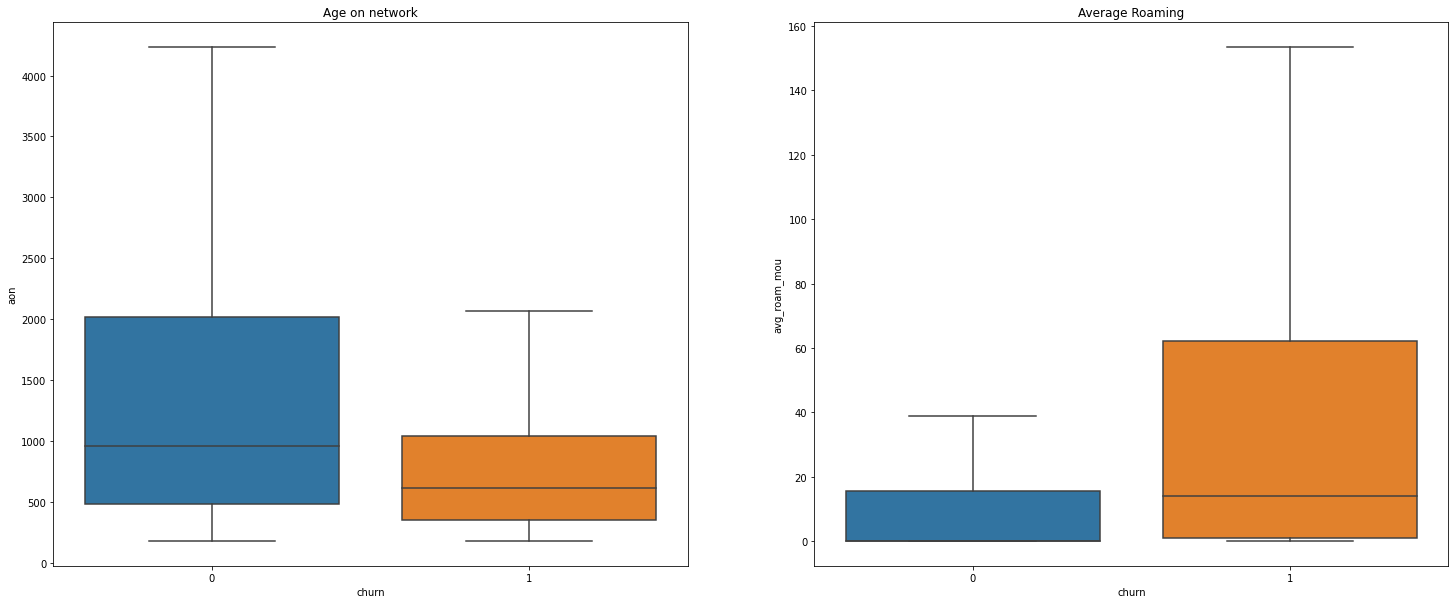

In [43]:
plt.figure(figsize=(25, 10))

# subplot 1
plt.subplot(1, 2, 1)
plt.title('Age on network')
ax=sns.boxplot(y=master.aon,x='churn',data=master, showfliers=False)

# subplot 2
plt.subplot(1, 2, 2)
plt.title('Average Roaming')
ax1=sns.boxplot(y=master.avg_roam_mou,x='churn',data=master, showfliers=False)

Longer the user use the network the lesser the tendency they churn. More the Roaming service used, higher the tendency to churn

In [44]:
# Metric: age on network 
# Conversion of the number of months by 12
cleaned_df['aon_years'] = cleaned_df['aon']/365
cleaned_df['aon_years'] = cleaned_df['aon_years'].astype(int)

In [45]:
def plot_continuous_variable_boxPlot(cleaned_df,param):    
    
    not_churned_df=cleaned_df[cleaned_df.churn == 0]
    churned_df=cleaned_df[cleaned_df.churn  == 1]
    
    plt.figure(figsize=(20, 10)) 
    plt.subplot(1,2,1)
    sns.boxplot(y=not_churned_df[param])
    plt.title(param +' distribution for Not Churned ',fontsize=20)
    
    plt.subplot(1,2,2)
    sns.boxplot(y=churned_df[param])
    plt.title(param +' distribution for Churned ',fontsize=20)
    plt.show()

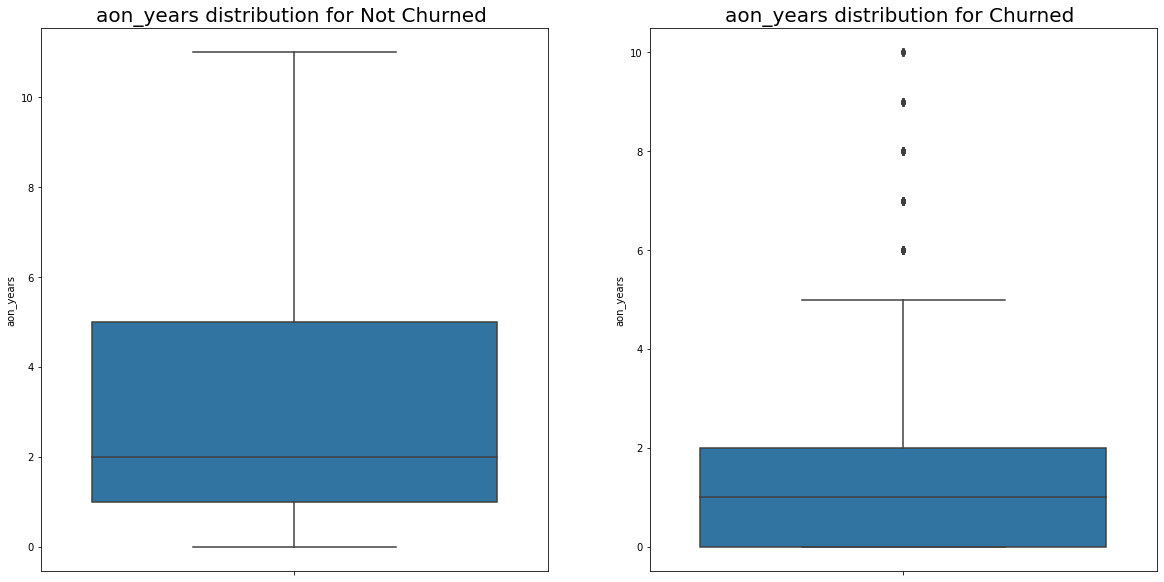

In [46]:
aon_df = cleaned_df[['churn','aon_years']]
plot_continuous_variable_boxPlot(aon_df,'aon_years')

aon_years distribution for churned customers has some outliers.

In [47]:
cleaned_df['churn'].value_counts()

0    27390
1     2589
Name: churn, dtype: int64

In [48]:
cleaned_df['aon_years'].value_counts()

1     7616
0     4853
2     4661
3     3044
6     2069
4     1980
7     1826
8     1523
5     1251
9      572
10     556
11      28
Name: aon_years, dtype: int64

Checking null values

In [49]:
(cleaned_df.isnull().sum() * 100 / len(df)).sort_values(ascending=False)

avg_roam_mou          1.150012
loc_og_t2t_mou_8      0.938009
std_og_mou_8          0.938009
loc_ic_t2m_mou_8      0.938009
ic_others_8           0.938009
                        ...   
last_day_rch_amt_7    0.000000
last_day_rch_amt_8    0.000000
vol_2g_mb_6           0.000000
vol_2g_mb_7           0.000000
arpu_6                0.000000
Length: 130, dtype: float64

Replacing all nan with 0

In [50]:
cleaned_df.fillna(0, inplace=True)

Checking Null values

In [51]:
cleaned_df.columns[cleaned_df.apply(lambda df : (df.isnull().sum() * 100 / len(df))>0)]

Index([], dtype='object')

In [52]:
(cleaned_df.isnull().sum() * 100 / len(df)).sort_values(ascending=False)

aon_years           0.0
std_og_t2t_mou_8    0.0
std_og_t2m_mou_7    0.0
std_og_t2m_mou_8    0.0
std_og_t2f_mou_6    0.0
                   ... 
total_rech_num_7    0.0
total_rech_num_8    0.0
total_rech_amt_6    0.0
total_rech_amt_7    0.0
arpu_6              0.0
Length: 130, dtype: float64

In [55]:
new_df = cleaned_df.copy()

# Train and Test Split

In [56]:
X = new_df.drop(['churn'], axis=1)
y = new_df['churn']

# new_df.drop('churn', axis=1, inplace=True)

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=42)

In [58]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,...,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_per_month,avg_roam_mou,%chg_in_arpu,aon_years
3167,669.049,689.999,800.932,162.39,150.51,183.93,676.68,848.59,885.28,0.0,0.00,0.00,0.0,0.00,0.00,160.38,150.51,183.93,340.78,560.29,603.38,51.36,65.61,19.54,0.00,0.00,0.00,552.53,776.43,806.86,2.01,0.00,0.00,284.53,222.59,262.14,0.0,0.00,0.2,286.54,...,0.00,6,3,8,221,1221,221,154,1000,154,0,67,0,163.08,144.02,18.7,0.0,202.29,128.08,1,1,1,0,0,0,0,0,0,0,0,0,2128,114.2,169.42,0.0,0.0,721.0,0.000000,17.866624,5
44269,380.235,399.416,296.683,58.03,117.13,289.61,328.84,239.36,227.73,0.0,0.00,0.00,0.0,0.00,0.00,14.84,13.53,11.41,96.49,37.46,21.73,0.00,0.00,0.00,0.01,0.00,0.00,111.34,50.99,33.14,43.18,103.59,278.19,232.03,200.13,205.99,0.0,0.00,0.0,275.21,...,0.00,9,12,13,389,456,384,50,50,79,30,50,79,0.00,15.97,0.0,0.0,0.00,0.00,0,0,0,0,1,0,0,0,0,0,1,0,291,0.0,0.00,0.0,0.0,422.5,0.000000,-23.893383,0
43088,428.088,578.976,497.969,30.93,13.71,33.19,100.18,103.26,115.44,0.0,0.00,0.00,0.0,0.00,0.00,7.24,9.38,22.74,45.64,66.36,49.78,0.00,0.00,0.00,1.01,0.48,10.01,52.89,75.74,72.53,23.68,4.33,10.44,16.31,6.14,54.68,0.0,5.48,0.0,39.99,...,0.00,10,9,10,400,674,582,110,128,144,50,50,30,5.44,0.00,0.0,0.0,0.00,0.00,0,0,0,1,0,0,0,0,0,1,0,0,2122,0.0,0.00,0.0,0.0,537.0,0.000000,-1.104796,5
90567,613.236,343.481,188.270,701.29,277.46,232.03,340.88,262.66,38.23,0.0,10.98,6.48,0.0,39.79,19.69,38.94,25.38,1.81,16.06,9.16,2.63,0.00,0.00,0.00,15.19,0.00,0.00,55.01,34.54,4.44,662.34,239.96,220.93,309.61,222.38,25.18,0.0,0.00,0.0,971.96,...,5.21,28,13,7,716,430,176,50,120,36,30,0,30,0.00,0.00,0.0,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1184,0.0,0.00,0.0,0.0,573.0,25.646667,-60.642489,3
44541,399.735,291.429,162.476,156.51,50.58,41.64,251.36,220.76,96.49,0.0,0.00,0.00,0.0,0.00,0.00,156.51,50.58,41.64,236.69,203.38,82.14,5.66,2.31,1.63,0.70,0.00,0.56,398.88,256.28,125.43,0.00,0.00,0.00,4.75,11.66,0.00,0.0,0.00,0.0,4.75,...,0.00,11,8,9,477,327,190,120,120,30,20,20,20,0.00,0.00,0.0,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,857,0.0,0.00,0.0,0.0,402.0,0.000000,-52.984820,2


In [59]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20985, 129), (8994, 129), (20985,), (8994,))

# Scaling

In [60]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

# Utility Functions

In [61]:
def my_confusion_matrix(cf_matrix):
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  
  return sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='binary')

In [62]:
my_df = pd.DataFrame(index=['Accuracy','F1 Score','Precision','Recall'])
def update_model_metrics(name,y_test,preds):
  '''
  This function will save all model and its metrics
  for plotting and comparsion
  '''
  accuracy = round(metrics.accuracy_score(y_test, preds),2)
  f1 = round(metrics.f1_score(y_test, preds),2)
  precision = round(metrics.precision_score(y_test, preds),2)
  recall = round(metrics.recall_score(y_test, preds),2)
  cf_matrix = confusion_matrix(y_test, preds)

  if 'Best Score' in my_df.columns.tolist():
    my_df.drop('Best Score',axis=1,inplace=True)
  
  my_df[name] = [accuracy,f1,precision,recall]
  my_df['Best Score'] = my_df.idxmax(axis=1)

  return None

In [63]:
from sklearn.model_selection import GridSearchCV

def hyper_parameter_tweeking(param_test,model):
  '''
  This function is used to tweak hyper parameter of 
  a machine learning model and return best params
  '''
  %%time

  gsearch = GridSearchCV(estimator = model, param_grid = param_test, scoring='recall',n_jobs=4,iid=False, cv=3)
  gsearch.fit(X_train, y_train)
  print("gsearch.best_params_",gsearch.best_params_)
  print("gsearch.best_score_",gsearch.best_score_)

  return gsearch.best_params_

# Modelling

Use Hyper parameter tuning on all models to get best out of it.

# Interpretable Model

Steps content
* Logistic Regression
* Imbalance Check and Resampling (For details [Click Me](https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18?gi=d7054327864) )
  * Oversampling minority class
  * Undersampling minority class
  * Synthetic Minority Oversampling Technique
* Apply best sampling method from previous step
* Decision Tree
* Use RFE with LR
* Random Forest
* GaussianNB


In [64]:
X_train.shape

(20985, 129)

### Simple Logistic Regression

In [65]:
param_test = {
    'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty' : ['l1','l2'],
    'C' : [50000,10000,5000,1000,100, 10, 1.0, 0.1, 0.01]  
  }
confirm = input("To use new best param enter 1 else just enter. It will load last saved one.\n")
if confirm=="1":
  print("Getting new best params. Please wait...")
  best_param_lr = hyper_parameter_tweeking(param_test,LogisticRegression())
else:
  print("Loading old saved best params.")
  best_param_lr = {'C': 50000, 'penalty': 'l2', 'solver': 'newton-cg'}
print(best_param_lr)

To use new best param enter 1 else just enter. It will load last saved one.

Loading old saved best params.
{'C': 50000, 'penalty': 'l2', 'solver': 'newton-cg'}


In [66]:
lr = LogisticRegression(**best_param_lr)
lr.fit(X_train,y_train)

preds = lr.predict(X_test)
print(f'Accuracy : {round(metrics.accuracy_score(y_test, preds),2)} ')

Accuracy : 0.93 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


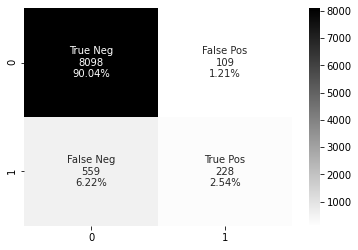

In [67]:
cf_matrix = confusion_matrix(y_test, preds)
my_confusion_matrix(cf_matrix)

In [68]:
update_model_metrics('LR',y_test,preds)
my_df

,LR,Best Score
Accuracy,0.93,LR
F1 Score,0.41,LR
Precision,0.68,LR
Recall,0.29,LR


As we can see the Accuracy is good but the recall is very low. We want to get the most churn as correct. So we will be more focusing on recall

### Imbalance Check and Resampling

In [69]:
print("Data Imbalance in Train Data : ", round((y_train != 0).sum()/(y_train == 0).sum(),3))
print("Data Imbalance in Test Data : ", round((y_test != 0).sum()/(y_test == 0).sum(),3))

Data Imbalance in Train Data :  0.094
Data Imbalance in Test Data :  0.096


We will try below three sampling techinique to balance our data and select best one

* Oversampling minority Class
* Undersampling minority Class
* Synthetic Minority Oversampling Technique

#### Resampling Techniques — Oversample minority class

In [70]:
X_train.shape,y_train.shape

((20985, 129), (20985,))

In [71]:
temp_X_train = pd.DataFrame(X_train,columns=X.columns.to_list())

temp_y_train = y_train.reset_index(drop=True)

In [72]:
temp_X_train.shape,temp_y_train.shape

((20985, 129), (20985,))

In [73]:
re_X = pd.concat([temp_X_train, temp_y_train], axis=1)

not_churn = re_X[re_X.churn==0]
churn = re_X[re_X.churn==1]

In [74]:
from sklearn.utils import resample

churn_upsampled = resample(churn,
                          replace=True, # sample with replacement
                          n_samples=len(not_churn), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_churn, churn_upsampled])

# check new class counts
upsampled.churn.value_counts()

1    19183
0    19183
Name: churn, dtype: int64

In [75]:
re_y_train = upsampled.churn
re_X_train = upsampled.drop('churn', axis=1)

In [76]:
lr = LogisticRegression(max_iter=1000)
lr.fit(re_X_train,re_y_train)

preds = lr.predict(X_test)
print(f'Accuracy : {round(metrics.accuracy_score(y_test, preds),2)} ')

Accuracy : 0.83 


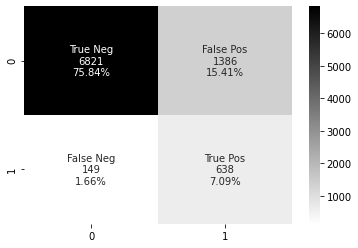

In [77]:
cf_matrix = confusion_matrix(y_test, preds)
my_confusion_matrix(cf_matrix)

In [78]:
update_model_metrics('OverSampling LR',y_test,preds)
my_df

,LR,OverSampling LR,Best Score
Accuracy,0.93,0.83,LR
F1 Score,0.41,0.45,OverSampling LR
Precision,0.68,0.32,LR
Recall,0.29,0.81,OverSampling LR


#### Resampling techniques — Undersample majority class

In [79]:
not_churn_downsampled = resample(not_churn,
                                replace = False, # sample without replacement
                                n_samples = len(churn), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_churn_downsampled, churn])

# checking counts
downsampled.churn.value_counts()

1    1802
0    1802
Name: churn, dtype: int64

In [80]:
re_y_train = downsampled.churn
re_X_train = downsampled.drop('churn', axis=1)

In [81]:
lr = LogisticRegression(max_iter=1000)
lr.fit(re_X_train,re_y_train)
preds = lr.predict(X_test)
print(f'Accuracy : {round(metrics.accuracy_score(y_test, preds),2)} ')

Accuracy : 0.82 


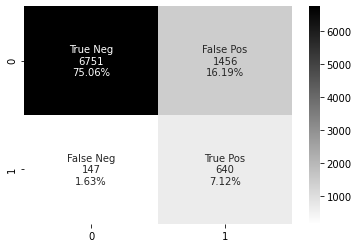

In [82]:
cf_matrix = confusion_matrix(y_test, preds)
my_confusion_matrix(cf_matrix)

In [83]:
update_model_metrics('UnderSampling LR',y_test,preds)
my_df

,LR,OverSampling LR,UnderSampling LR,Best Score
Accuracy,0.93,0.83,0.82,LR
F1 Score,0.41,0.45,0.44,OverSampling LR
Precision,0.68,0.32,0.31,LR
Recall,0.29,0.81,0.81,OverSampling LR


####  Synthetic Minority Oversampling Technique

In [84]:
from imblearn.over_sampling import SMOTE

# Use cleaned X_train and y_train not from above example
sm = SMOTE(random_state=42, ratio=1.0, kind="regular")
re_X_train, re_y_train = sm.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [85]:
lr = LogisticRegression(**best_param_lr).fit(re_X_train, re_y_train)

preds = lr.predict(X_test)
print(f'Accuracy : {round(metrics.accuracy_score(y_test, preds),2)} ')

Accuracy : 0.84 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


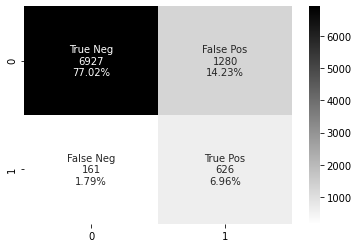

In [86]:
cf_matrix = confusion_matrix(y_test, preds)
my_confusion_matrix(cf_matrix)

In [87]:
update_model_metrics('SMOTE LR',y_test,preds)
my_df

,LR,OverSampling LR,UnderSampling LR,SMOTE LR,Best Score
Accuracy,0.93,0.83,0.82,0.84,LR
F1 Score,0.41,0.45,0.44,0.46,SMOTE LR
Precision,0.68,0.32,0.31,0.33,LR
Recall,0.29,0.81,0.81,0.80,OverSampling LR


Recommeding Sampling Technique

* Simple LR has very low Recall so rejecting
* SMOTE RF has highest F1 score and perform better than all.
* Ranking SMOTE RF->Oversampling->UnderSampling->Simple LR

### The best sampling came out was SMOTE so Applying SMOTE to train

In [88]:
sm = SMOTE(random_state=42, ratio=1.0, kind="regular")
X_train, y_train = sm.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [89]:
try:
  my_df.drop(['OverSampling LR',	'UnderSampling LR'],axis=1,inplace=True)
  my_df
except:
  pass

In [90]:
lr = LogisticRegression(**best_param_lr).fit(X_train, y_train)

preds = lr.predict(X_test)
print(f'Accuracy : {round(metrics.accuracy_score(y_test, preds),2)} ')

Accuracy : 0.84 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [91]:
update_model_metrics('SMOTE LR',y_test,preds)
my_df

,LR,SMOTE LR,Best Score
Accuracy,0.93,0.84,LR
F1 Score,0.41,0.46,SMOTE LR
Precision,0.68,0.33,LR
Recall,0.29,0.80,SMOTE LR


As we can see with SMOTE we are able to get way better Recall score. Which is a great thing

### Applying RFE

In [92]:
%%time
from sklearn.feature_selection import RFE

lr = LogisticRegression()

# running RFE with 50 variables as output
rfe = RFE(lr, 50)   
rfe = rfe.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


CPU times: user 1min 33s, sys: 35.7 s, total: 2min 9s
Wall time: 1min 6s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [93]:
rfe_features = list(X.columns[rfe.support_])
print("Features identified by RFE ", rfe_features)

Features identified by RFE  ['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_8', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2m_mou_7', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_8', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_7', 'spl_ic_mou_8', 'ic_others_7', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_7', 'sachet_3g_8', 'aon', 'sep_vbc_3g', 'avg_roam_mou']


In [94]:
X_train = pd.DataFrame(data=X_train).iloc[:, rfe.support_]
X_test = pd.DataFrame(data=X_test).iloc[:, rfe.support_]

In [95]:
old_colnames = X_train.columns
new_colnames = rfe_features
X_train.rename(columns={i:j for i,j in zip(old_colnames,new_colnames)}, inplace=True)
X_test.rename(columns={i:j for i,j in zip(old_colnames,new_colnames)}, inplace=True)

In [96]:
lr = LogisticRegression(**best_param_lr)
lr.fit(X_train, y_train)

LogisticRegression(C=50000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
preds = lr.predict(X_test)
print(f'Accuracy : {round(metrics.accuracy_score(y_test, preds),2)} ')

Accuracy : 0.84 


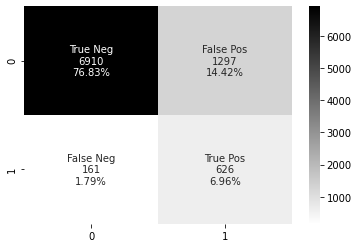

In [98]:
cf_matrix = confusion_matrix(y_test, preds)
my_confusion_matrix(cf_matrix)

In [99]:
update_model_metrics('RFE LR',y_test,preds)
my_df

,LR,SMOTE LR,RFE LR,Best Score
Accuracy,0.93,0.84,0.84,LR
F1 Score,0.41,0.46,0.46,SMOTE LR
Precision,0.68,0.33,0.33,LR
Recall,0.29,0.80,0.80,SMOTE LR


Now thats great we are getting same recall with features reduced to 50

### Decision Tree

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
param_test = {
  'max_features' : [10,20,30,40,50,60,70,80,90],
  'max_depth' : [3,5,10,15]
    
}

confirm = input("To use new best param enter 1 else just enter. It will load last saved one.\n")
if confirm=="1":
  print("Getting new best params. Please wait...")
  best_param_dt = hyper_parameter_tweeking(param_test,DecisionTreeClassifier())
else:
  print("Loading old saved best params.")
  best_param_dt = {'max_depth': 15, 'max_features': 30}
print(best_param_dt)

To use new best param enter 1 else just enter. It will load last saved one.

Loading old saved best params.
{'max_depth': 15, 'max_features': 30}


In [102]:
dtr_model = DecisionTreeClassifier(**best_param_dt)
dtr_model.fit(X_train, y_train)
preds = dtr_model.predict(X_test)
print(f'Accuracy : {round(metrics.accuracy_score(y_test, preds),2)} ')

Accuracy : 0.89 


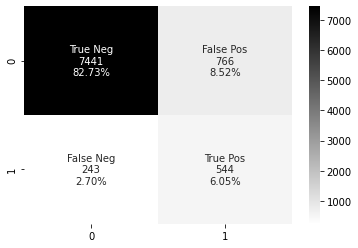

In [103]:
cf_matrix = confusion_matrix(y_test, preds)
my_confusion_matrix(cf_matrix)

In [104]:
update_model_metrics('Decision Tree',y_test,preds)
my_df

,LR,SMOTE LR,RFE LR,Decision Tree,Best Score
Accuracy,0.93,0.84,0.84,0.89,LR
F1 Score,0.41,0.46,0.46,0.52,Decision Tree
Precision,0.68,0.33,0.33,0.42,LR
Recall,0.29,0.80,0.80,0.69,SMOTE LR


### Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
param_test = {
  'max_features' : ['auto'], # sqrt
  # 'max_depth' : [3,5,10,15],
  'min_samples_split' : [2, 5, 10,50,100,500,1000,2000,5000],
  'bootstrap' : [False], #true
  # 'min_samples_leaf' : [1, 2, 4]
  
}

confirm = input("To use new best param enter 1 else just enter. It will load last saved one.\n")
if confirm=="1":
  print("Getting new best params. Please wait...")
  best_param_rf = hyper_parameter_tweeking(param_test,RandomForestClassifier())
else:
  print("Loading old saved best params.")
  best_param_rf = {'bootstrap': False, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 300, 'criterion' : 'entropy',
                                      'max_depth' : 36,
                                      'min_samples_leaf' : 810,
                                      'min_samples_split' : 1800,
                                      'random_state' : 100}
print(best_param_rf)

To use new best param enter 1 else just enter. It will load last saved one.

Loading old saved best params.
{'bootstrap': False, 'max_features': 'auto', 'min_samples_split': 1800, 'n_estimators': 300, 'criterion': 'entropy', 'max_depth': 36, 'min_samples_leaf': 810, 'random_state': 100}


In [107]:
rfc = RandomForestClassifier(**best_param_rf).fit(X_train, y_train)

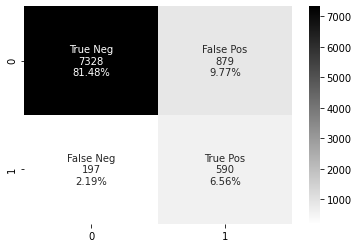

In [108]:
preds = rfc.predict(X_test)
cf_matrix = confusion_matrix(y_test, preds)
my_confusion_matrix(cf_matrix)

In [109]:
update_model_metrics('Random Forest',y_test,preds)
my_df

,LR,SMOTE LR,RFE LR,Decision Tree,Random Forest,Best Score
Accuracy,0.93,0.84,0.84,0.89,0.88,LR
F1 Score,0.41,0.46,0.46,0.52,0.52,Decision Tree
Precision,0.68,0.33,0.33,0.42,0.40,LR
Recall,0.29,0.80,0.80,0.69,0.75,SMOTE LR


### Gaussain NB

In [110]:
from sklearn.naive_bayes import GaussianNB

In [111]:
param_test = {
  'var_smoothing': np.logspace(0,-9, num=100)
}

confirm = input("To use new best param enter 1 else just enter. It will load last saved one.\n")
if confirm=="1":
  print("Getting new best params. Please wait...")
  best_param_gaussian = hyper_parameter_tweeking(param_test,GaussianNB())
else:
  print("Loading old saved best params.")
  best_param_gaussian = {'var_smoothing': 1.0}
print(best_param_gaussian)

To use new best param enter 1 else just enter. It will load last saved one.

Loading old saved best params.
{'var_smoothing': 1.0}


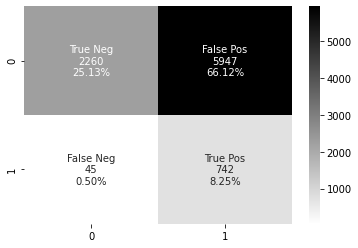

In [112]:
gnb_model = GaussianNB(**best_param_gaussian).fit(X_train,y_train)
preds = gnb_model.predict(X_test)
cf_matrix = confusion_matrix(y_test, preds)
my_confusion_matrix(cf_matrix)

In [113]:
update_model_metrics('GaussianNB',y_test,preds)
my_df

,LR,SMOTE LR,RFE LR,Decision Tree,Random Forest,GaussianNB,Best Score
Accuracy,0.93,0.84,0.84,0.89,0.88,0.33,LR
F1 Score,0.41,0.46,0.46,0.52,0.52,0.20,Decision Tree
Precision,0.68,0.33,0.33,0.42,0.40,0.11,LR
Recall,0.29,0.80,0.80,0.69,0.75,0.94,GaussianNB


As we can see Random Forest is best out of all so will we go ahead with Random Forest

# High performance Model

1. Use PCA to reduce features
2. PCA with LR
3. PCA with Random Forest
4. XG Boost
5. GaussianNB with PCA
6. Ensembling
7. Feature Importances


### PCA

In [114]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [115]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [116]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.165261,0.010456,arpu_6
1,0.271573,-0.079470,arpu_7
2,0.294696,-0.111332,arpu_8
3,0.062310,0.006029,onnet_mou_6
4,0.152786,-0.069367,onnet_mou_8


In [178]:
np.cumsum(pca.explained_variance_ratio_)

array([0.14258065, 0.26733889, 0.35408153, 0.41663159, 0.46538693,
       0.51303892, 0.55580434, 0.59394749, 0.62747666, 0.65307063,
       0.6761727 , 0.69787814, 0.71873452, 0.73898365, 0.75608907,
       0.77297786, 0.78930105, 0.80485599, 0.81929581, 0.83328622,
       0.84717384, 0.86045013, 0.87342373, 0.88599477, 0.89778525,
       0.90796701, 0.91800413, 0.92743469, 0.93591328, 0.94406734,
       0.9511923 , 0.95792525, 0.96420009, 0.96948182, 0.9741107 ,
       0.97868195, 0.98307231, 0.98705021, 0.99068783, 0.99385014,
       0.99585983, 0.99694181, 0.99797354, 0.99869997, 0.99940075,
       0.99968977, 0.99982489, 0.99993937, 0.99999742, 1.        ])

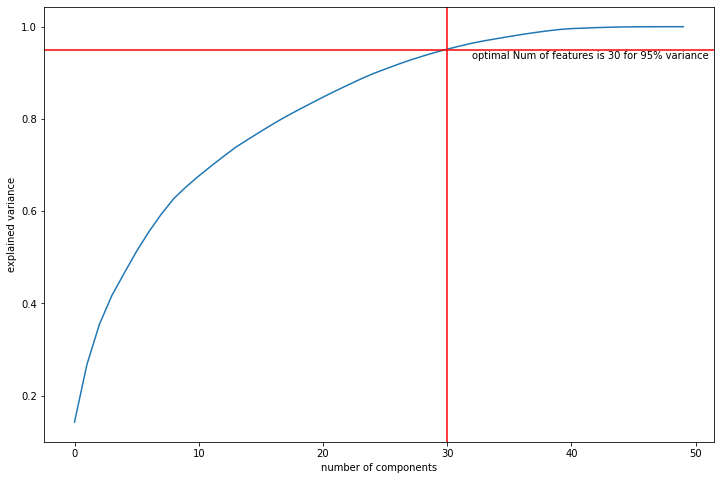

In [179]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.axvline(x=30,c ='red')
plt.axhline(y=0.95, c = 'red')
plt.annotate(s ='optimal Num of features is 30 for 95% variance' ,xy=[0,0.95], xytext = (32, 0.93))
plt.show()

In [120]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=30)

In [121]:
pca_train = pca_final.fit_transform(X_train)
pca_train.shape

(38366, 30)

In [122]:
pca_test = pca_final.transform(X_test)
pca_test.shape

(8994, 30)

In [123]:
lr = LogisticRegression(**best_param_lr)
lr.fit(pca_train,y_train)

LogisticRegression(C=50000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
preds = lr.predict(pca_test)
metrics.accuracy_score(y_test, preds)

0.8331109628641317

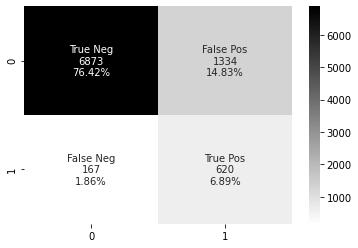

In [125]:
cf_matrix = confusion_matrix(y_test, preds)
my_confusion_matrix(cf_matrix)

In [126]:
update_model_metrics('PCA LR',y_test,preds)
my_df

,LR,SMOTE LR,RFE LR,Decision Tree,Random Forest,GaussianNB,PCA LR,Best Score
Accuracy,0.93,0.84,0.84,0.89,0.88,0.33,0.83,LR
F1 Score,0.41,0.46,0.46,0.52,0.52,0.20,0.45,Decision Tree
Precision,0.68,0.33,0.33,0.42,0.40,0.11,0.32,LR
Recall,0.29,0.80,0.80,0.69,0.75,0.94,0.79,GaussianNB


### Random Forest on PCA

In [127]:
%%time

optimal_tree = RandomForestClassifier(**best_param_rf)
optimal_tree.fit(pca_train, y_train)

CPU times: user 1min 8s, sys: 30.6 ms, total: 1min 8s
Wall time: 1min 9s


In [128]:
preds = optimal_tree.predict(pca_test)
metrics.accuracy_score(y_test, preds)

0.8596842339337336

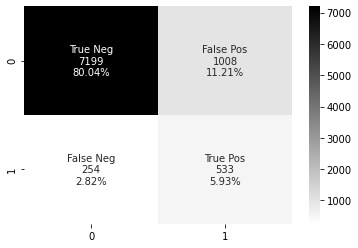

In [129]:
cf_matrix = confusion_matrix(y_test, preds)
my_confusion_matrix(cf_matrix)

In [130]:
update_model_metrics('PCA Random Forest',y_test,preds)
my_df

,LR,SMOTE LR,RFE LR,Decision Tree,Random Forest,GaussianNB,PCA LR,PCA Random Forest,Best Score
Accuracy,0.93,0.84,0.84,0.89,0.88,0.33,0.83,0.86,LR
F1 Score,0.41,0.46,0.46,0.52,0.52,0.20,0.45,0.46,Decision Tree
Precision,0.68,0.33,0.33,0.42,0.40,0.11,0.32,0.35,LR
Recall,0.29,0.80,0.80,0.69,0.75,0.94,0.79,0.68,GaussianNB


### XG Boost

In [131]:
from xgboost import XGBClassifier

param_test = {
  'min_child_weight':[5,6],
  'max_depth': range(3,5),
  'n_estimators':[10,20,30,40,50,70,100,150],
  'scale_pos_weight':[1,2,3,4],
  'colsample_bytree':[0.7,0.8], 
  'subsample':[0.7,0.8],
  'gamma':[0,0.2,0.4]
    
}

confirm = input("To use new best param enter 1 else just enter. It will load last saved one.\n")
if confirm=="1":
  print("Getting new best params. Please wait...")
  best_param_xgboost = hyper_parameter_tweeking(param_test,XGBClassifier())
else:
  print("Loading old saved best params.")
  best_param_xgboost = {'learning_rate' : 0.1, 'n_estimators' : 150, 'max_depth': 4, 'min_child_weight' : 5,
                        'gamma' : 0,'nthread' : 4, 'subsample' : 0.8, 'colsample_bytree' : 0.8,
                      'objective' : 'binary:logistic','scale_pos_weight' : 3,'seed' : 29}
print(best_param_xgboost)

To use new best param enter 1 else just enter. It will load last saved one.

Loading old saved best params.
{'learning_rate': 0.1, 'n_estimators': 150, 'max_depth': 4, 'min_child_weight': 5, 'gamma': 0, 'nthread': 4, 'subsample': 0.8, 'colsample_bytree': 0.8, 'objective': 'binary:logistic', 'scale_pos_weight': 3, 'seed': 29}


In [132]:
%%time
modelXg = XGBClassifier(**best_param_xgboost)
modelXg.fit(pca_train, y_train)

CPU times: user 17.5 s, sys: 235 ms, total: 17.8 s
Wall time: 10.1 s


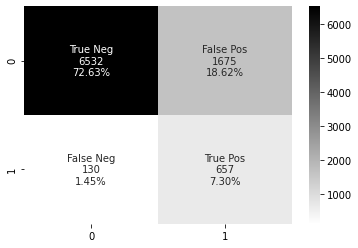

In [133]:
preds = modelXg.predict(pca_test)
cf_matrix = confusion_matrix(y_test, preds)
my_confusion_matrix(cf_matrix)

In [134]:
update_model_metrics('PCA XG Boost',y_test,preds)
my_df

,LR,SMOTE LR,RFE LR,Decision Tree,Random Forest,GaussianNB,PCA LR,PCA Random Forest,PCA XG Boost,Best Score
Accuracy,0.93,0.84,0.84,0.89,0.88,0.33,0.83,0.86,0.80,LR
F1 Score,0.41,0.46,0.46,0.52,0.52,0.20,0.45,0.46,0.42,Decision Tree
Precision,0.68,0.33,0.33,0.42,0.40,0.11,0.32,0.35,0.28,LR
Recall,0.29,0.80,0.80,0.69,0.75,0.94,0.79,0.68,0.83,GaussianNB


### Gaussian NB with PCA

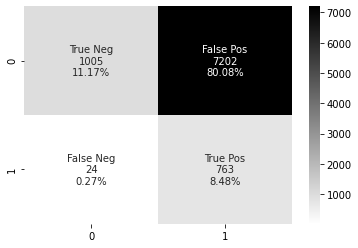

In [147]:
gnb_model = GaussianNB(**best_param_gaussian).fit(pca_train,y_train)
preds = gnb_model.predict(pca_test)
cf_matrix = confusion_matrix(y_test, preds)
my_confusion_matrix(cf_matrix)

In [148]:
update_model_metrics('PCA Gaussian',y_test,preds)
my_df

,LR,SMOTE LR,RFE LR,Decision Tree,Random Forest,GaussianNB,PCA LR,PCA Random Forest,PCA XG Boost,Ensembling,PCA Gaussian,Best Score
Accuracy,0.93,0.84,0.84,0.89,0.88,0.33,0.83,0.86,0.80,0.82,0.20,LR
F1 Score,0.41,0.46,0.46,0.52,0.52,0.20,0.45,0.46,0.42,0.44,0.17,Decision Tree
Precision,0.68,0.33,0.33,0.42,0.40,0.11,0.32,0.35,0.28,0.31,0.10,LR
Recall,0.29,0.80,0.80,0.69,0.75,0.94,0.79,0.68,0.83,0.81,0.97,PCA Gaussian


### Ensembling

In [155]:
%%time
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier([('clf1',lr),('clf2',gnb_model),('clf3',modelXg),('clf4',optimal_tree)], voting='soft').fit(pca_train,y_train)

CPU times: user 1min 27s, sys: 446 ms, total: 1min 27s
Wall time: 1min 18s


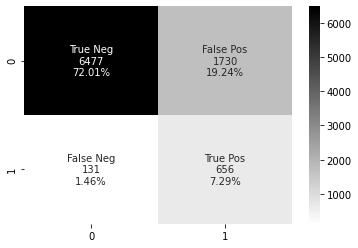

In [156]:
preds = vc.predict(pca_test)
cf_matrix = confusion_matrix(y_test, preds)
my_confusion_matrix(cf_matrix)

In [157]:
update_model_metrics('Ensembling',y_test,preds)
my_df

,LR,SMOTE LR,RFE LR,Decision Tree,Random Forest,GaussianNB,PCA LR,PCA Random Forest,PCA XG Boost,Ensembling,PCA Gaussian,Best Score
Accuracy,0.93,0.84,0.84,0.89,0.88,0.33,0.83,0.86,0.80,0.79,0.20,LR
F1 Score,0.41,0.46,0.46,0.52,0.52,0.20,0.45,0.46,0.42,0.41,0.17,Decision Tree
Precision,0.68,0.33,0.33,0.42,0.40,0.11,0.32,0.35,0.28,0.27,0.10,LR
Recall,0.29,0.80,0.80,0.69,0.75,0.94,0.79,0.68,0.83,0.83,0.97,PCA Gaussian


## Feature Importance

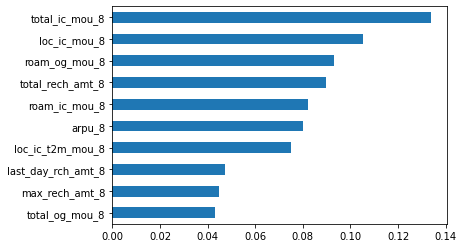

In [175]:
features = X_train.columns.values
t_X = pd.DataFrame(X_train)
t_X.columns = features

importances = rfc.feature_importances_
weights = pd.Series(importances,
                 index=t_X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

# Recommendations

* Only 8% of users are churned. Which means the provider is good.
* Gaussian is the best model if we highly focused only on churned users.
* Other best models XG BOOST -> Ensembled -> Random Forest
* We recommeded 30 features to classify the best churn users.
* Features like recharge amount or maximum recharge amount can be strong indicator to a churn person
* AON - We should start focusing on customers who have been with the telecom service with longer period of time, we should take periodic feedback from these customers and try to resolve there issue if any.
* We can provide additional offers for these customers.
* If the customer is having very less incoming call then the person may churn in near future and we can provide some plans to retain them.
* The customer who are using roaming services are likely to churn, so we can bring new plans to lure the customers during roaming.